## Linear Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.options.display.max_columns = 500
pd.options.display.max_rows = 10

plt.style.use('fivethirtyeight')

In [2]:


data = pd.read_csv('final_data/clean_english_data.csv') 

In [3]:
for col in data.columns:
    if type(data[col].loc[22]) == str:
        data[col] = data[col].astype('category').cat.codes
        


In [4]:
x = data.drop(columns=['vegetables', 'carbohidrates', 'legumes', 'cheese',
 'meat', 'fish', 'eggs', 'fruits morning', 'fruits evening', 
 'snacks morning', 'snacks evening', 'diet health score'])

y = data['diet health score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
linearmodel = LinearRegression(normalize=True)
linearmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [6]:
prediction = linearmodel.predict(x_test)

In [7]:
r2_score(y_test, prediction)

0.33023546034952167

In [20]:
diz = {}
for col, coef in zip(x_test.columns, linearmodel.coef_):
    diz[col] = coef 
diz = {k: v for k, v in sorted(diz.items(), key=lambda item: item[1])}
diz
# Bike code, sleeping hours and walk frequency, as sleeping hours code, walks code and bike frequency were mishandled during the process,
# we can just ignore them

{'bike code': -558893245709.3503,
 'sleeping hours': -496838255775.4252,
 'walk frequency': -458826030092.4226,
 'sugary drinks code': -63962308535.69581,
 'skip meals': -0.5270181490293364,
 'sex': -0.18730851254502837,
 'steps app': -0.10474801699538192,
 'cooking frequency': -0.09011508547605651,
 'drugs frequency': -0.07823304722219067,
 'which meals skip': -0.05118751692974429,
 'supplement frequency': -0.03687014860670813,
 'frozen food a month': -0.02059145543104496,
 'fast food a month': -0.019646253843447294,
 'smoke': -0.016951171745483613,
 'bike': -0.01520435500070585,
 'delivered food a month': -0.01046735398011484,
 'bed time': -0.009784714078606286,
 'weight': -0.006633910858795977,
 'working status': -0.006136894784547428,
 'sport effort': -0.0031831309718628703,
 'sleep importance': -0.0016442492961751313,
 'drinks': -0.0008873990183148181,
 'food impact on health': -0.0004222342441489739,
 'nationality': -0.0003022839573337238,
 'age': -0.0002189651315990131,
 'age at

In [24]:

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='green')
    
def plot_linreg(var):
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(x_train[var]).reshape(-1,1), y_train)
    

    abline(linreg.coef_, linreg.intercept_)
    coef = round(linreg.coef_[0],4)
    inter = round(linreg.intercept_,4)
    pred = linreg.predict(x_test[var].values.reshape(-1,1))
    
    plt.scatter(pred, y_test)
    plt.title(var)
    print(var,
          "\nSlope: " + str(coef),
          "\nIntercept: " + str(inter),
          "\nR squared: " + str(round(r2_score(y_test, pred), 4)), 
          "\nMean Absolute Error " + str(round(mean_absolute_error(y_test, pred), 4)) +
          "\n \n")
    
def print_r2():
    for col in x.columns:
        lr = LinearRegression(normalize=True)
        lr.fit(x_train[col].values.reshape(-1,1), y_train)
        coef = round(lr.coef_[0],4)
        inter = round(lr.intercept_,4)
        pred = lr.predict(x_test[col].values.reshape(-1,1))
        print(col,
              "\nSlope: " + str(coef),
              "\nIntercept: " + str(inter),
              "\nR squared: " + str(round(r2_score(y_test, pred), 4)), 
              "\nMean Squared Error " + str(round(mean_squared_error(y_test, pred), 4)) +
              "\n \n")
        


sex 
Slope: -0.3066 
Intercept: 0.0984 
R squared: 0.039 
Mean Absolute Error 0.8002
 



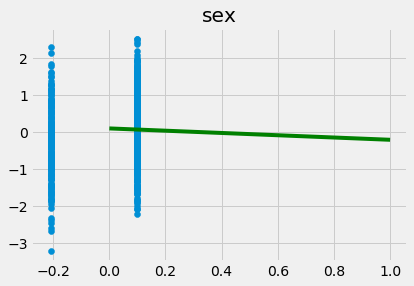

In [27]:
plot_linreg('sex')

In [8]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', )

model.fit(x_train, y_train)

predictions = model.predict(x_test)

r2_score(y_test, predictions)

/home/ginko/.virtualenvs/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.3162925843002866

In [28]:
print_r2()

sex 
Slope: -0.3066 
Intercept: 0.0984 
R squared: 0.039 
Mean Squared Error 0.9695
 

age 
Slope: 0.0107 
Intercept: -0.2928 
R squared: 0.008 
Mean Squared Error 1.0008
 

housemates 
Slope: 0.0326 
Intercept: -0.0665 
R squared: 0.0002 
Mean Squared Error 1.0087
 

city 
Slope: 0.0873 
Intercept: -0.076 
R squared: 0.0144 
Mean Squared Error 0.9943
 

nationality 
Slope: -0.0012 
Intercept: 0.0655 
R squared: 0.0053 
Mean Squared Error 1.0035
 

region 
Slope: 0.051 
Intercept: -0.1186 
R squared: -0.0012 
Mean Squared Error 1.0101
 

qualification 
Slope: 0.0473 
Intercept: -0.071 
R squared: -0.0102 
Mean Squared Error 1.0192
 

working status 
Slope: 0.0011 
Intercept: -0.0112 
R squared: -0.0008 
Mean Squared Error 1.0096
 

weight 
Slope: -0.0129 
Intercept: 0.9086 
R squared: 0.0395 
Mean Squared Error 0.969
 

bed time 
Slope: 0.0075 
Intercept: -0.0186 
R squared: 0.0 
Mean Squared Error 1.0088
 

sleeping hours 
Slope: 0.097 
Intercept: -0.154 
R squared: 0.0038 
Mean Squar